In [1]:
import openpyxl
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import f_classif,mutual_info_classif,SelectKBest
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("C:/Users/Jason/BBDS/github/ML_Project/DATA/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


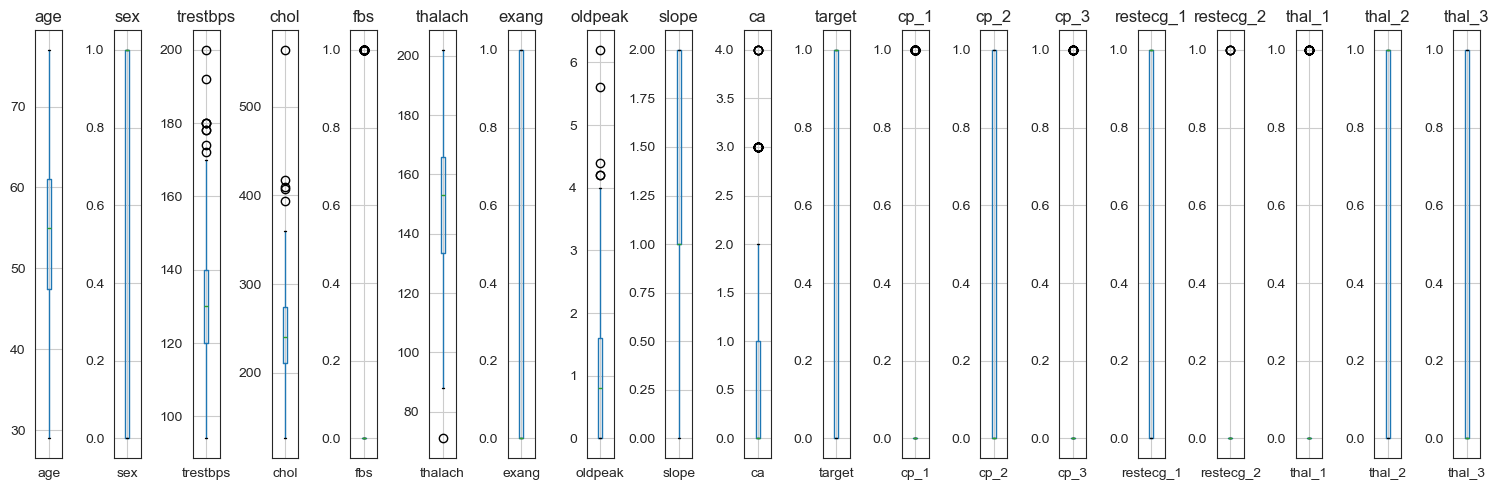

In [24]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

# Loop through each column and create a boxplot
for i, column in enumerate(df.columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

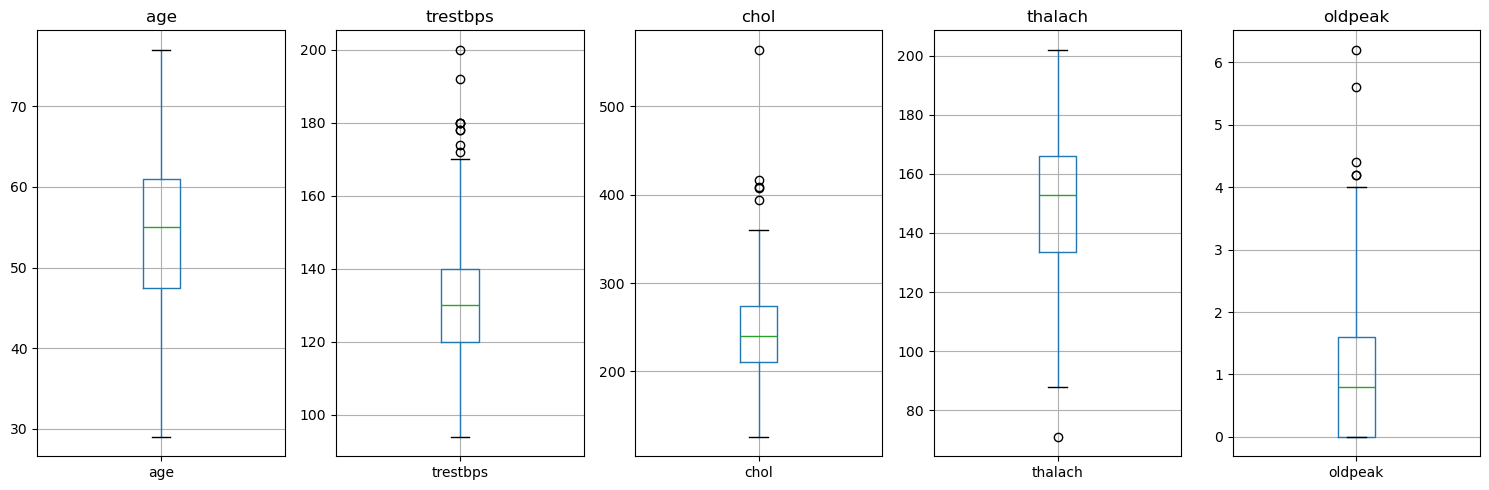

In [6]:
# List of columns to create boxplots for
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create subplots for each selected column
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(15, 5))

# Loop through each selected column and create a boxplot
for i, column in enumerate(selected_columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

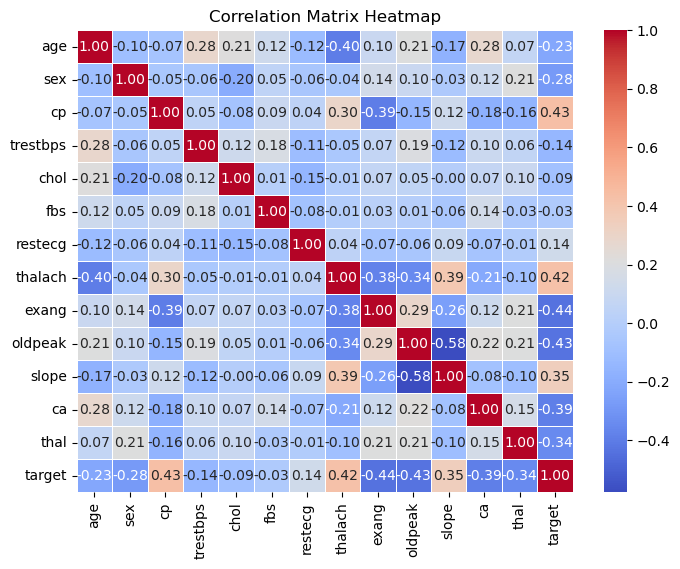

In [7]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

In [9]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,1,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,1,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,0,0,0,0,1,0,0,0,1
299,45,1,110,264,0,132,0,1.2,1,0,0,0,0,1,1,0,0,0,1
300,68,1,144,193,1,141,0,3.4,1,2,0,0,0,0,1,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,0,1


# EDA

In [18]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1',
       'restecg_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [10]:
df[df['target']==1].groupby('sex')['target'].count()

sex
0    72
1    93
Name: target, dtype: int64

In [11]:
df[df['target']==0].groupby('sex')['target'].count()

sex
0     24
1    114
Name: target, dtype: int64

In [12]:
df[df['target']==1]['chol'].mean()

242.23030303030302

In [13]:
df[df['target']==0]['chol'].mean()

251.08695652173913

# Modeling


In [14]:
#Define X,y
X = df.drop("target",axis=1)
y = df["target"]
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,0,1,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,0,0,0,1,0,0,0,1
299,45,1,110,264,0,132,0,1.2,1,0,0,0,1,1,0,0,0,1
300,68,1,144,193,1,141,0,3.4,1,2,0,0,0,1,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,1,0,0,0,1,0,0,0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)
scaler = MinMaxScaler()


In [16]:
#apply SelectKBest to hole dataset class to extract top 10 best features 

#number of top features we want
k = 14
select_k_best=SelectKBest(mutual_info_classif, k = k)
X_train_kbest = select_k_best.fit_transform(X_train, y_train)
X_test_kbest = select_k_best.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_kbest, y_train)
y_pred = model.predict(X_test_kbest)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Confusion Matrix ===
[[27  8]
 [ 8 33]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        35
           1       0.80      0.80      0.80        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [17]:
features_names=X_train.columns
select_mask = select_k_best.get_support() #boolean array of seelcted features
selected_features_names = features_names[select_mask]

print("Selected features by SelectKBest:")
print(selected_features_names)

Selected features by SelectKBest:
Index(['age', 'sex', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'cp_1', 'cp_2', 'restecg_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')
